In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## Importing the required modules

In [0]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix , confusion_matrix

## Importing data from the txt files

In [0]:
#Opening a new file to write the report, if the file exists before it will be re-written
f = open (r'/content/drive/My Drive/Data/ResMed_Assignment_Equivalence/Evaluation_each_file.txt', 'w')

# create an empty dictionary to store the data
format_data={}

# Create an empty list to store the data
Evaluation_file_name = []
Evaluation_percentage = []

# Create an empty dataframe to store the data in dataframe format
df_concat = pd.DataFrame()

# Access the data files from the directory ResMed_Assignment
file_names = sorted(glob.glob("/content/drive/My Drive/Data/ResMed_Assignment/*.txt"))

# "file_names" consists of the 38 text file names from the dataset
for f in file_names:
  #reading individual file 
  data = open (f).read().split()
  #formatting the read data and assigning to the dictionary names
  format_data[data[0]+'_'+data[1]] = [int('{}'.format(x)) for x in data[2]] 
  format_data[data[3]+'_'+data[4]] = [int('{}'.format(x)) for x in data[5]]
  
  # Convert the dictionary to the pandas dataframe
  df = pd.DataFrame.from_dict(format_data)
  
  # Concatinating all the files into the single data frame to create whole dataset
  df_concat = pd.concat([df_concat , df], ignore_index = True)
  
  # For evaluating summary of the each file into a "text" file, 
  #the percentage of correct evaluation between reference data and test data
  # is caluclated for each  dataset
  #The idea is to create a dataframe with file name and percentage of correct predictions
  
  # Extracting file name from the path 
  filename_w_ext = os.path.basename(f)
  
  #Seperating file name and file extension
  name_file, file_extension = os.path.splitext(filename_w_ext)
  
  # To caluclate number of correct predicitons a new column is created
  df['Equivalence_numeric'] = np.where(df['reference_data'] == df['test_data'] , 1.0, 0.0)
  
  # Equivalence Percentage of a file is caluclated
  percentage = 100.0 - (df.shape[0] - df.Equivalence_numeric.sum()) / df.shape[0] * 100.0
  
  # Appending information of equivalence percentage to the lists
  Evaluation_file_name.append (name_file)
  Evaluation_percentage.append (round(percentage,2))
  
# Putting the data of list into dataframe
Evaluation_each_file = pd.DataFrame ({ 'Evaluation_file_name' : Evaluation_file_name,
                             'Evaluation_percentage' : Evaluation_percentage})




####Provides a text file report of the performance of the system under evaluation for each fileSaving the perfromance of evaluvation of38 text files into one text file

In [0]:
Evaluation_each_file.to_csv(r'/content/drive/My Drive/Data/ResMed_Assignment_Equivalence/Evaluation_each_file.txt',header=True, index=None, sep=' ', mode = 'a')

"df_concat" consists of concatinated dataset of all 38 text files. Understanding of all the dataset 
is very important.

Checking for the discrete values whether there are only 4 as it is mentioned in the task or more?

In [173]:
print ('Reference data unique values' ,df_concat['reference_data'].unique())
print ('Test data unique values' ,df_concat['test_data'].unique())

Reference data unique values [1 5 6 7 0]
Test data unique values [1 5 6 7]


Checking for any "NaN"s

In [174]:
df_concat.isnull().sum()

reference_data    0
test_data         0
dtype: int64

From the above analysis it is observed that "reference_data" also has "0" reading and the same is not present in the test_data.

Also in the task it is mentioned that Hypnogram measurement consists of only 4 discrete values
(1,5,6,7). 
it is understood that "0" is an outlier and needs to be removed.

In [175]:
print ('Shape of the dataframe before deleting the zeros from reference_data', df_concat.shape)
df_concat = df_concat[df_concat['reference_data'] !=0]
print ('Shape of the dataframe after deleting the zeros from reference_data',  df_concat.shape)

Shape of the dataframe before deleting the zeros from reference_data (36231, 2)
Shape of the dataframe after deleting the zeros from reference_data (36107, 2)


### Plotting the accuracy measurement of each file against a file, to see the prediction accuracy of each file.


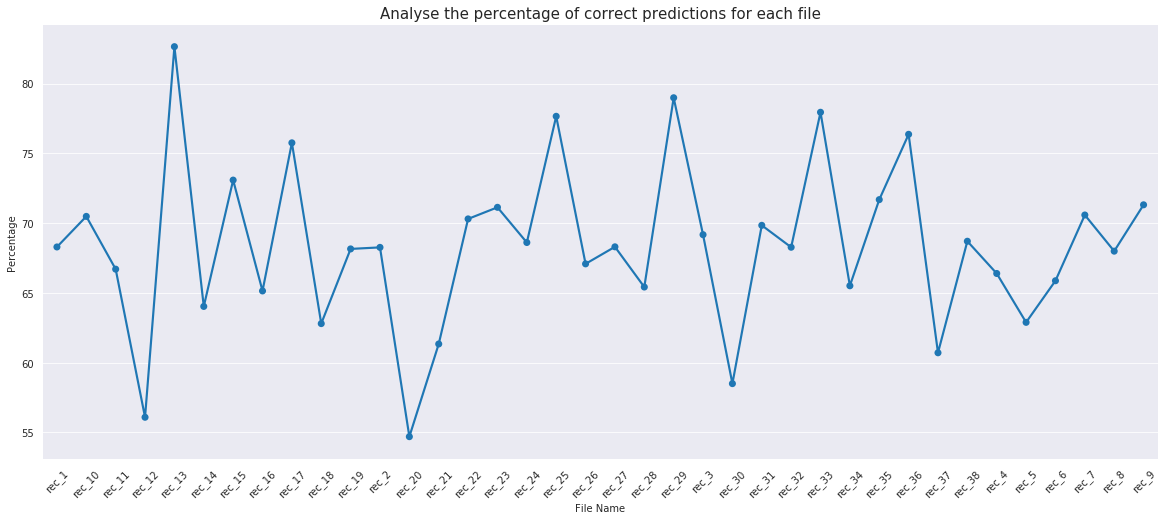

In [176]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(20,8))

s = sns.pointplot(x="Evaluation_file_name", y="Evaluation_percentage",  height=10, aspect=5, legend = True, data=Evaluation_each_file, ax = ax)
s.set_title ('Analyse the percentage of correct predictions for each file', fontsize=15)
s.set_xlabel("File Name",fontsize=10)
s.set_ylabel("Percentage",fontsize=10)
s.tick_params(labelsize=10)

# Rotate the labels on x-axis
s.set_xticklabels(s.get_xticklabels(), rotation=45)
plt.show()


## ##Performing Exploratory data analysis on df_concat.



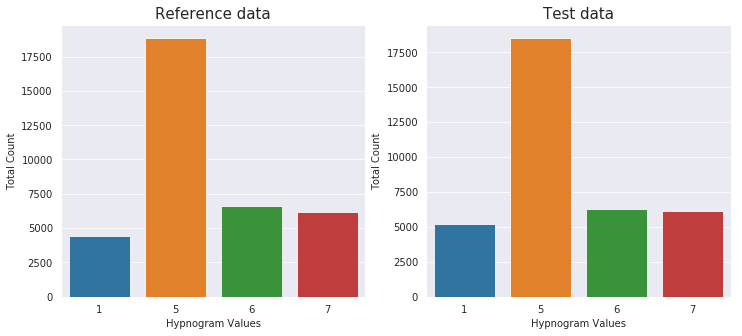

In [177]:
#Creating an empty dataframe for test_data
test_data_unique = pd.DataFrame()
#Assigining data into the dataframe
test_data_unique = df_concat['test_data'].value_counts().reset_index()

#Creating an empty dataframe for reference_data
reference_data_unique = pd.DataFrame()
reference_data_unique = df_concat['reference_data'].value_counts().reset_index()

#Plotting the columns of the dataframes
fig, ax = plt.subplots(1,2, figsize=(12,5))

s = sns.barplot(x = "index", y = 'reference_data' ,data=reference_data_unique, ax = ax[0])
s.set_xlabel("Hypnogram Values",fontsize=10)
s.set_ylabel("Total Count",fontsize=10)
s.tick_params(labelsize=10)
s.set_title ('Reference data', fontsize=15)

# Initialize second subplot
s = sns.barplot ( x='index', y = 'test_data', data = test_data_unique, ax = ax[1] )
s.set_xlabel("Hypnogram Values",fontsize=10)
s.set_ylabel("Total Count",fontsize=10)
s.tick_params(labelsize=10)
s.set_title ('Test data', fontsize=15)


plt.show()


####Plotting the pie charts of the same to get the distribution percentage

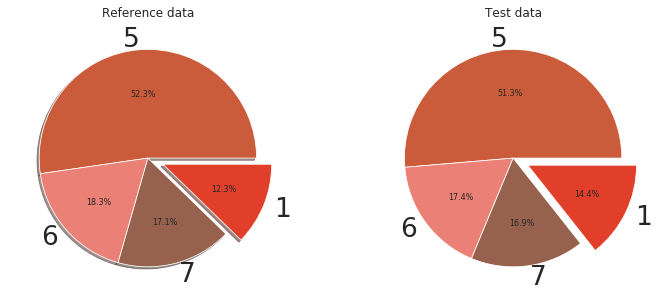

In [181]:
# Create a list of colors 
colors = ["#CB5C3B", "#EB8076", "#96624E","#E13F29", "#D69A80", "#D63B59", "#AE5552"]

fig1, ax = plt.subplots(1,2, figsize=(12,5))
# Create a pie chart
ax[0].pie(reference_data_unique['reference_data'],labels=reference_data_unique['index'],
    shadow=True,colors=colors,explode=(0, 0, 0, 0.15),autopct='%1.1f%%',)
ax[0].set_title ('Reference data', fontsize=12) 
    
# Create a pie chart
ax[1].pie(test_data_unique['test_data'],labels=test_data_unique['index'],
          shadow=False,colors=colors,explode=(0, 0, 0, 0.15),autopct='%1.1f%%',)
ax[1].set_title ('Test data', fontsize=12)
plt.show()

#### Creating a new column to the dataframe df_concat

Calculating the percentage of the correct prediction for the whole dataset

In [182]:
# Creating new column with logic for concatinated data frame ("df_concat")
df_concat['Equivalence_numeric'] =  np.where (df_concat['reference_data'] == df_concat['test_data'] , 1.0, 0.0)

# Creating a new dataframe with only Equivalence values
true_pred = df_concat[df_concat['Equivalence_numeric'] == 1.0]

# Creating a new dataframe with not Equivalence values
error_pred = df_concat[df_concat['Equivalence_numeric'] == 0.0]
print ("The number of Equivalence values in the whole dataset are {} and Total number of Non-Equivalence values are {}" .format (true_pred.shape[0] , error_pred.shape[0]))
# Calculating the total Percentage of the equivalence

percentage = round (100 - (((true_pred.shape[0]+error_pred.shape[0]) - true_pred.shape[0] )/ (true_pred.shape[0]+error_pred.shape[0]) *100.0), 2)
print ('Total percentage of the correct prediction for whole dataset is {}% '. format (percentage))

The number of Equivalence values in the whole dataset are 24740 and Total number of Non-Equivalence values are 11367
Total percentage of the correct prediction for whole dataset is 68.52% 


#### Number of columns of df_concat dataframe

In [183]:
df_concat.columns

Index(['reference_data', 'test_data', 'Equivalence_numeric'], dtype='object')

###Saving the WHOLE data into text file


In [0]:
df_concat.to_csv(r'/content/drive/My Drive/Data/ResMed_Assignment_Equivalence/Evaluation_whole_data.txt', header=True, index=None, sep=' ', mode='a')

 Since there consists of only 4 discrete values in hypnogram data.
 The total number of discrete values for each combination can be caluclated by using "GROUP BY" function.

By doing "Groupby" on columns ['reference_data', 'test_data'] and aggregating ['Equivalence_numeric']
the number of combinations between the two columns is counted.



In [0]:
# Creating a DataFrame "group_data_true" by applying groupby on df_concat
group_data_true = pd.DataFrame ({'Aggregation': df_concat.groupby(['reference_data', 'test_data'])['Equivalence_numeric'].count()})
group_data_true = group_data_true.reset_index()
#Creating a new column with percentage and assigning the values
group_data_true['Percentage'] = round(100.0 - (df_concat.shape[0] - group_data_true.Aggregation) / df_concat.shape[0] * 100.0 , 2)


####Plotting the above grouped data

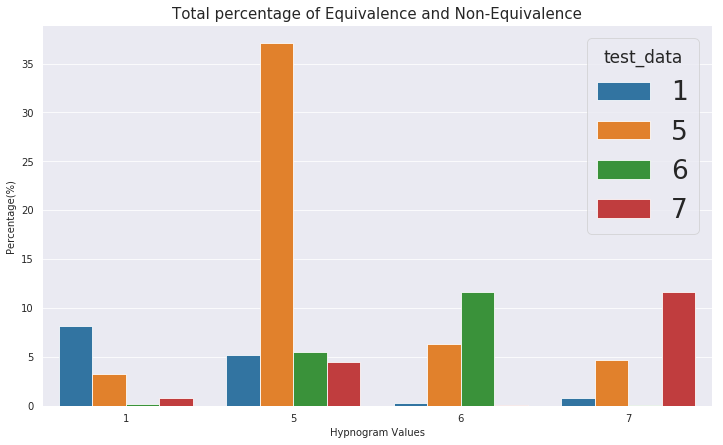

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_context("paper", font_scale=3, rc={"font.size":8,"axes.labelsize":20, 'title' : 'pandhi' })
fig, ax = plt.subplots(figsize=(12,7))
s = sns.barplot ( x= 'reference_data' , y = 'Percentage' , hue = 'test_data',  data = group_data_true, ax = ax )
s.set_xlabel("Hypnogram Values",fontsize=10)
s.set_ylabel("Percentage(%) ",fontsize=10)
s.tick_params(labelsize=10)
s.set_title ('Total percentage of Equivalence and Non-Equivalence', fontsize=15)
plt.show()

## CONFUSION Matrix

In [0]:
#Applying confusion matrix to the dF_concat 
x = multilabel_confusion_matrix (df_concat['reference_data'], df_concat['test_data'], labels = [1,5,6,7])


#### Calculating Recall, Precision, Accuracy

In [0]:
Recall = []
Precision = []
Accuracy = []
number = []
for i, j in enumerate (df_concat['reference_data'].unique()):
  
  Recall_ = x[i][1][1] / (x[i][1][1] + x[i][0][1])
  Precision_ = x[i][1][1] / (x[i][1][1] + x[i][1][0])
  Accuracy_ = (x[i][1][1] + x[i][0][0])/ (x[i][0][0] + x[i][0][1] + x[i][1][0] + x[i][1][1])
  Recall.append(Recall_)
  Precision.append(Precision_)
  Accuracy.append (Accuracy_)
  number.append(j)

Evaluation_whole_data = pd.DataFrame ({
    'Number' : number,
    'Recall' : Recall,
    'Precision' : Precision,
    'Accuracy' : Accuracy
})

#### Saving the performance metrcis of the whole dataset to the text file 'Evaluation_confusion_matrix.txt'

In [0]:
Evaluation_whole_data.to_csv(r'/content/drive/My Drive/Data/ResMed_Assignment_Equivalence/Evaluation_confusion_matrix.txt',header=True, index=None, sep=' ', mode = 'w')

#### Comparing the confusion matrix scores

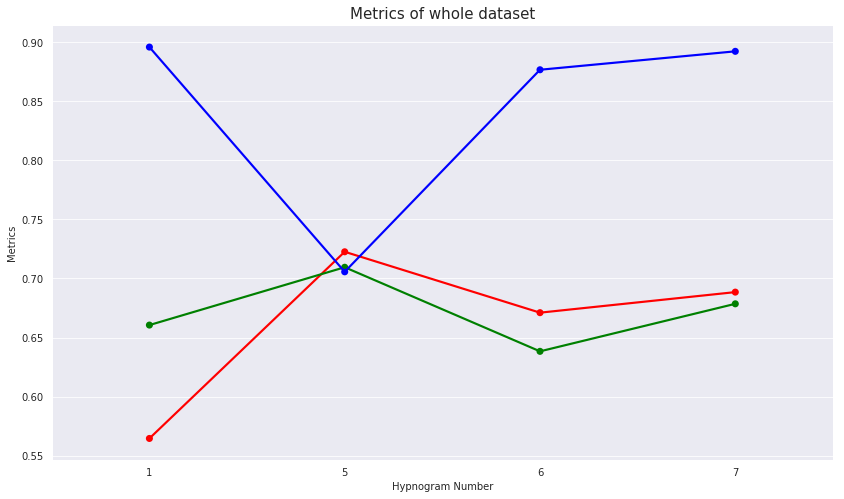

In [190]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(14,8))
s = sns.pointplot(x="Number", y="Recall", label = 'Recall', color = 'r', data=Evaluation_whole_data, ax = ax)
s = sns.pointplot(x="Number", y="Precision", label = 'Precision',color = 'g', data=Evaluation_whole_data, ax = ax)
s = sns.pointplot(x="Number", y="Accuracy", label = 'Accuracy', color = 'b',data=Evaluation_whole_data, ax = ax)

#s.legend(['Recall', 'Precision', 'Accuracy'], facecolor='w')

ax.set_title('Metrics of whole dataset', fontsize=15)
ax.set_xlabel("Hypnogram Number",fontsize=10)
ax.set_ylabel("Metrics",fontsize=10)
ax.tick_params(labelsize=10)

plt.show()